
Copyright **`(c)`** 2023 Edoardo Vay  `<vay.edoardo@gmail.com>`

<https://github.com/Edoxy>


In [1]:
import lab9_lib
import EvolutionAlgorithm as EA
from matplotlib import pyplot as plt

import numpy as np

/Users/edovay/Documents/code/Polito_Code/ING_MAT/ANNO_2/ComputationalIntelligence/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Problem 1

 14%|█▍        | 144/1000 [00:00<00:04, 190.75it/s]

Number of fitness calls:  7450
11111111111111111111111111111111111111111111111111: 99.80%


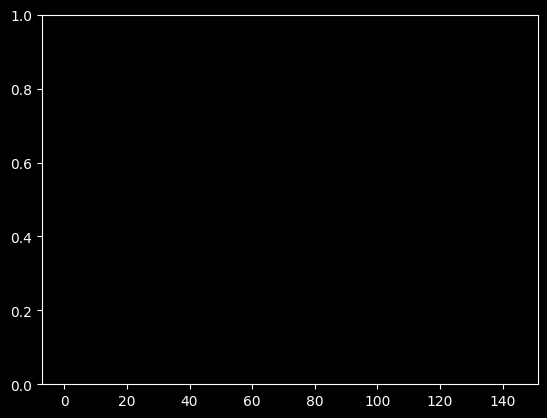

In [11]:
fitness = lab9_lib.TEST(1)

fitness_best, best, history, fitness_calls = EA.EA_v2(
    mu=200,
    lamda=50,
    generations=1_000,
    tournament_size=1,
    MUTATION_PROB=0.1,
    fitness=fitness,
    mutation_func=EA.random_change,
    xover_func=EA.xover_multiple_point,
    parent_selection_func=EA.tournament_opt,
)

print("Number of fitness calls: ", fitness_calls)
print(f"{''.join(str(g) for g in best[0:50])}: {fitness_best:.2%}")
plt.plot(-np.array(history))
plt.ylim([0.0, 1.0])
plt.show()

# Problem 2

 20%|█▉        | 198/1000 [00:01<00:05, 148.50it/s]


Number of fitness calls:  10150
11111111111011111111111111111111111111111111111111: 97.00%


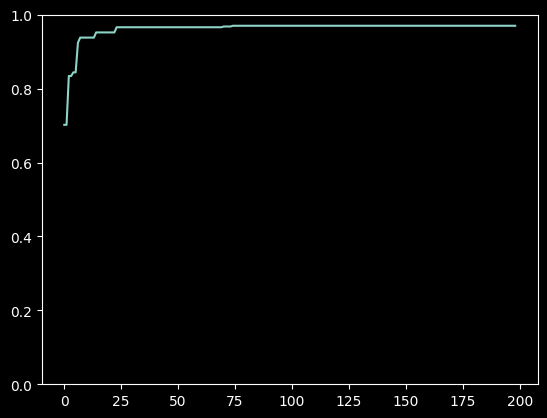

In [3]:
fitness = lab9_lib.TEST(2)

fitness_best, best, history, fitness_calls = EA.EA_v2(
    mu=200,
    lamda=50,
    generations=1_000,
    tournament_size=2,
    MUTATION_PROB=0.1,
    fitness=fitness,
    mutation_func=EA.random_change,
    xover_func=EA.xover_multiple_point,
    parent_selection_func=EA.tournament_opt,
)

print('Number of fitness calls: ',fitness_calls)
print(f"{''.join(str(g) for g in best[0:50])}: {fitness_best:.2%}")
plt.plot(np.array(history))
plt.ylim([0.0, 1.0])
plt.show()

# Problem 5

 19%|█▉        | 194/1000 [00:01<00:04, 183.57it/s]


Number of fitness calls:  9950
11111111111111111011111111111111111111111111111111: 98.00%


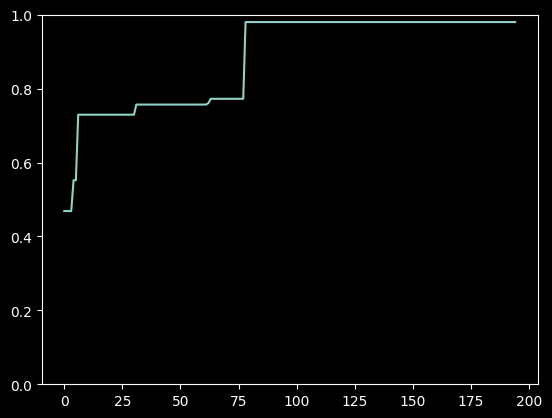

In [4]:
fitness = lab9_lib.TEST(5)

fitness_best, best, history, fitness_calls = EA.EA_v2(
    mu=200,
    lamda=50,
    generations=1_000,
    tournament_size=2,
    MUTATION_PROB=0.1,
    fitness=fitness,
    mutation_func=EA.random_change,
    xover_func=EA.xover_multiple_point,
    parent_selection_func=EA.tournament_opt,
)

print('Number of fitness calls: ',fitness_calls)
print(f"{''.join(str(g) for g in best[0:50])}: {fitness_best:.2%}")
plt.plot(np.array(history))
plt.ylim([0.0, 1.0])
plt.show()

# Problem 10

## Simple Evolution algorithm approach

For this problem a simple approch like this one has proven to be not very consistent of finding always a good solution with the parameters used before; for this reason, to try reaching a better solution I tried much Higher numbers in both the population size and offspring size. Preserving this much diversity in the population makes it much easier to find a solution.

 81%|████████  | 809/1000 [00:46<00:10, 17.53it/s]

Number of fitness calls:  406000
11111011111111101111111110111111111011110111101111: 88.08%


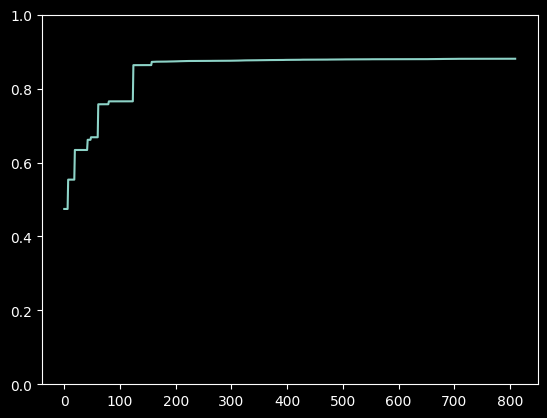

In [12]:
fitness = lab9_lib.TEST(10)

fitness_best, best, history, fitness_calls = EA.EA_v2(
    mu=1_000,
    lamda=500,
    generations=1_000,
    tournament_size=2,
    MUTATION_PROB=0.1,
    fitness=fitness,
    mutation_func=EA.random_change,
    xover_func=EA.xover_multiple_point,
    parent_selection_func=EA.tournament_opt,
)

print('Number of fitness calls: ',fitness_calls)
print(f"{''.join(str(g) for g in best[0:50])}: {fitness_best:.2%}")
plt.plot(np.array(history))
plt.ylim([0.0, 1.0])
plt.show()

## Islands Approach

To try preserving diverity I implemented my version of EA with Islands that are computed in parallel to improve performance.

In [10]:
fitness = lab9_lib.TEST(10)
n_islands = 7

fitness_best, best, history, island_history, fitness_calls = EA.EA_Islands(
    mu=500,
    lamda=125,
    generations=200,
    tournament_size=2,
    n_islands=n_islands,
    MUTATION_PROB=0.1,
    fitness=fitness,
    mutation_func=EA.random_change,
    xover_func=EA.xover_multiple_point,
    parent_selection_func=EA.tournament_opt,
)

print('\nNumber of total fitness calls: ',fitness_calls)
print(f"{''.join(str(g) for g in best[0:30])}: {fitness_best:.2%}")

Starting Islands phase ...


100%|██████████| 200/200 [00:05<00:00, 37.30it/s]


Island phase terminated

7500 fitness calls for island  1
14750 fitness calls for island  2
25500 fitness calls for island  3
25250 fitness calls for island  4
20500 fitness calls for island  5
10250 fitness calls for island  6
15750 fitness calls for island  7
Starting last population...


 25%|██▌       | 100/400 [00:01<00:03, 76.97it/s]


Number of total fitness calls:  132618
111111111111111111111111111111: 99.00%


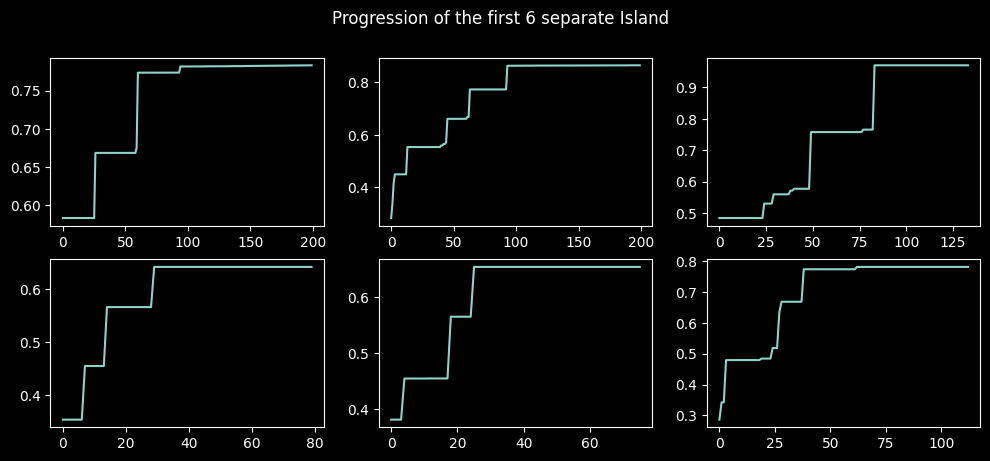

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.suptitle("Progression of the first 6 separate Island")
fig.set_figwidth(12)

ax[0, 0].plot(island_history[0])
# ax[0, 0].ylim([0, 1])
ax[0, 1].plot(island_history[1])
# ax[0, 1].ylim([0, 1])
ax[0, 2].plot(island_history[2])
# ax[0, 2].ylim([0, 1])
ax[1, 0].plot(island_history[3])
# ax[1, 0].ylim([0, 1])
ax[1, 1].plot(island_history[4])
# ax[1, 1].ylim([0, 1])
ax[1, 2].plot(island_history[5])
# ax[1, 2].ylim([0, 1])

plt.show()

The last island where all the best immigrants live together is not displayed because one _Champion_ is not improved after 100 generation and returned as the solution. Even if it seem that the Islands could produce a worst result in term of fitness call, it's much more reliable and is more capable to reach the best solution in the majority of cases.